In [27]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
import pandas as pd

In [28]:
# Load the dataset
df = pd.read_csv(r"D:\1.5110 Predictive Modeling\data_set_hackathon.csv")


In [29]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route
0,13.07.2009,28.01.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001
1,15.07.2009,24.03.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001
2,16.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001
3,17.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001
4,21.07.2009,01.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001
...,...,...,...,...,...,...,...,...,...,...,...
2415,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,FI0003
2416,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,FI0003
2417,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,FI0003
2418,13.07.2011,15.02.2012,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,FI0003


In [30]:
from datetime import datetime
import pandas as pd
def convert_date_format(original_date):
    original_format = "%d.%m.%Y"
    parsed_date = datetime.strptime(original_date, original_format)
    new_format = "%Y-%m-%d"
    formatted_date = parsed_date.strftime(new_format)
    return formatted_date

# Apply the function to the specified columns
df['order_date'] = df['order_date'].apply(convert_date_format)
df['requested_delivery_date'] = df['requested_delivery_date'].apply(convert_date_format)

# Display the modified DataFrame
print(df)

      order_date requested_delivery_date Customer Country Code Product Code  \
0     2009-07-13              2010-01-28                    RU    L10705000   
1     2009-07-15              2010-03-24                    RU    L10705000   
2     2009-07-16              2010-02-04                    RU    L10705000   
3     2009-07-17              2010-02-04                    RU    L10705000   
4     2009-07-21              2010-02-01                    RU    L10705000   
...          ...                     ...                   ...          ...   
2415  2011-07-13              2012-02-15                    HR    L12919200   
2416  2011-07-13              2012-02-15                    HR    L12919200   
2417  2011-07-13              2012-02-15                    HR    L12919200   
2418  2011-07-13              2012-02-15                    HR    L12919200   
2419  2012-01-23              2012-04-15                    RU    L12919200   

                      Description order_type  Custo

In [31]:
# Convert 'Requested Delivery Date' and 'Order Date' to datetime objects
df['order_date'] = pd.to_datetime(df['order_date'])
df['requested_delivery_date'] = pd.to_datetime(df['requested_delivery_date'])

# Calculate the time difference in days
df['Time Difference'] = (df['requested_delivery_date'] - df['order_date']).dt.days

# Add 'Fast Demand' column
df['Fast Demand'] = np.where(df['Time Difference'] > 30, 1, 0)

# Drop the temporary 'Time Difference' column if not needed
df = df.drop('Time Difference', axis=1)


In [32]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,Fast Demand
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001,1
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001,1
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001,1
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001,1
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12,FI0003,1
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12,FI0003,1
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12,FI0003,1
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10,FI0003,1


In [33]:
df['Product Code'].unique()

array(['L10705000', 'L10705100', 'L10705200', 'L10705300', 'L10705400',
       'L10705500', 'L10705600', 'L10705700', 'L10850600', 'L10850700',
       'L10850800', 'L10850900', 'L10852800', 'L10852900', 'L10853100',
       'L12134400', 'L12134500', 'L12134600', 'L12134700', 'L12135800',
       'L12135900', 'L12136000', 'L12136100', 'L12916800', 'L12916900',
       'L12917000', 'L12917100', 'L12917700', 'L12917800', 'L12917900',
       'L12918000', 'L12918400', 'L12918500', 'L12918600', 'L12918700',
       'L12918800', 'L12918900', 'L12919000', 'L12919100', 'L12919200'],
      dtype=object)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2420 non-null   datetime64[ns]
 1   requested_delivery_date  2420 non-null   datetime64[ns]
 2   Customer Country Code    2420 non-null   object        
 3   Product Code             2420 non-null   object        
 4   Description              2420 non-null   object        
 5   order_type               2420 non-null   object        
 6   Customer Order Code      2420 non-null   int64         
 7   value                    2420 non-null   float64       
 8   Curr                     2420 non-null   object        
 9   items                    2420 non-null   object        
 10  Route                    2420 non-null   object        
 11  Fast Demand              2420 non-null   int32         
dtypes: datetime64[ns](2), float64(1), 

In [35]:
df['items'] = pd.to_numeric(df['items'], errors='coerce')

### DELIVERY IN Autumn and  Feb to Apr

In [38]:
df['value'].fillna(0, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2420 non-null   datetime64[ns]
 1   requested_delivery_date  2420 non-null   datetime64[ns]
 2   Customer Country Code    2420 non-null   object        
 3   Product Code             2420 non-null   object        
 4   Description              2420 non-null   object        
 5   order_type               2420 non-null   object        
 6   Customer Order Code      2420 non-null   int64         
 7   value                    2420 non-null   float64       
 8   Curr                     2420 non-null   object        
 9   items                    2074 non-null   float64       
 10  Route                    2420 non-null   object        
 11  Fast Demand              2420 non-null   int32         
dtypes: datetime64[ns](2), float64(2), 

### Delivery in Aug and Sep, and Feb to Apr

<Figure size 1200x600 with 0 Axes>

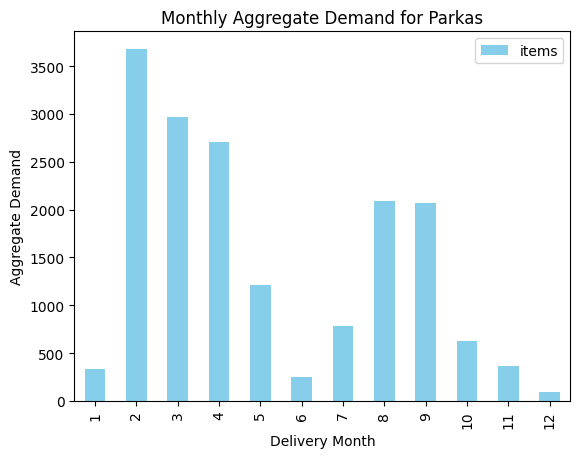

In [42]:
# Aggregate Demand
# By month
# Extract month from 'Requested Delivery Date'
df['DELIVERY_MONTH'] = df['requested_delivery_date'].dt.month

# Aggregate demand by month
monthly_aggregate_demand = df.groupby('DELIVERY_MONTH')['items'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
monthly_aggregate_demand.plot(kind='bar', x='DELIVERY_MONTH', y='items', color='skyblue')
plt.title('Monthly Aggregate Demand for Parkas')
plt.xlabel('Delivery Month')
plt.ylabel('Aggregate Demand')
plt.show()


### Make orders in SUMMER

<Figure size 1200x600 with 0 Axes>

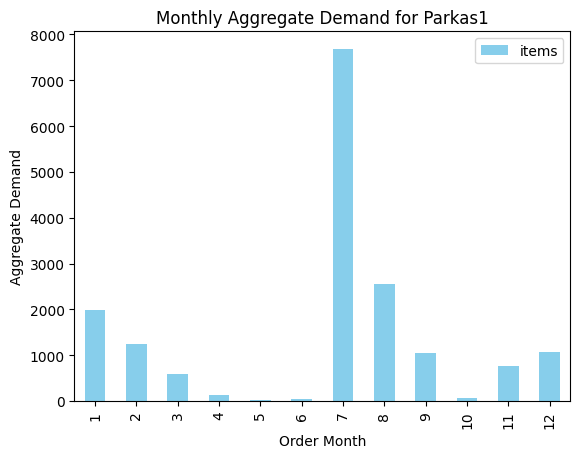

In [43]:
#By order date
df['ORDER_MONTH'] = df['order_date'].dt.month

# Aggregate demand by month
monthly_aggregate_demand2 = df.groupby('ORDER_MONTH')['items'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
monthly_aggregate_demand2.plot(kind='bar', x='ORDER_MONTH', y='items', color='skyblue')
plt.title('Monthly Aggregate Demand for Parkas1')
plt.xlabel('Order Month')
plt.ylabel('Aggregate Demand')
plt.show()

In [44]:
df.columns

Index(['order_date', 'requested_delivery_date', 'Customer Country Code',
       'Product Code', 'Description', 'order_type', 'Customer Order Code',
       'value', 'Curr', 'items', 'Route', 'Fast Demand', 'DELIVERY_MONTH',
       'ORDER_MONTH'],
      dtype='object')

### Delivery season

<Figure size 1200x600 with 0 Axes>

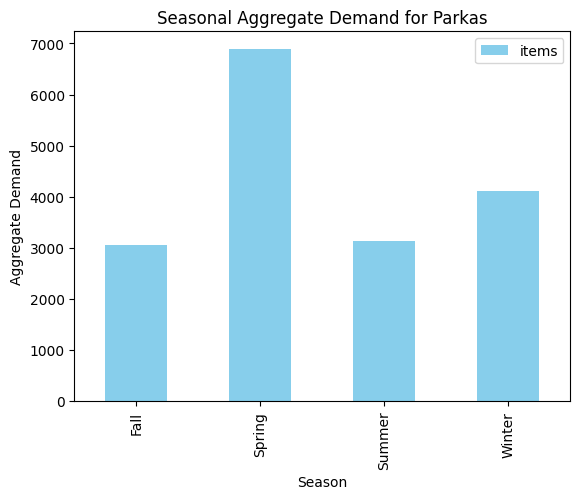

In [46]:
# By season (assuming 3-month seasons)
df['SEASON'] = df['DELIVERY_MONTH'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))
seasonal_aggregate_demand3 = df.groupby('SEASON')['items'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
seasonal_aggregate_demand3.plot(kind='bar', x='SEASON', y='items', color='skyblue')
plt.title('Seasonal Aggregate Demand for Parkas')
plt.xlabel('Season')
plt.ylabel('Aggregate Demand')
plt.show()


### Order season

Order in Autumn

<Figure size 1200x600 with 0 Axes>

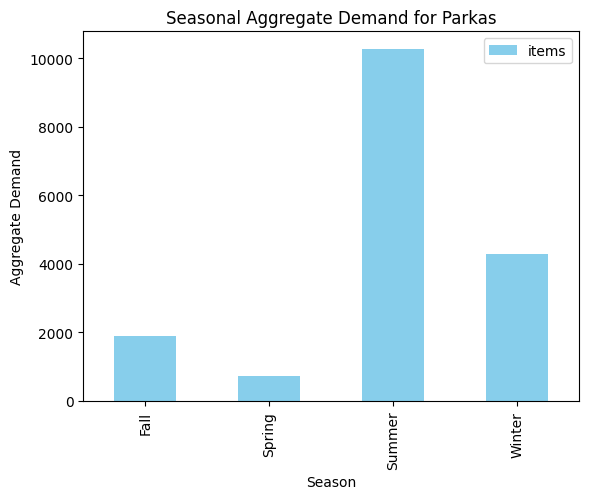

In [47]:
# By season (assuming 3-month seasons)
df['SEASON'] = df['ORDER_MONTH'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))
seasonal_aggregate_demand3 = df.groupby('SEASON')['items'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
seasonal_aggregate_demand3.plot(kind='bar', x='SEASON', y='items', color='skyblue')
plt.title('Seasonal Aggregate Demand for Parkas')
plt.xlabel('Season')
plt.ylabel('Aggregate Demand')
plt.show()

In [48]:
df.columns

Index(['order_date', 'requested_delivery_date', 'Customer Country Code',
       'Product Code', 'Description', 'order_type', 'Customer Order Code',
       'value', 'Curr', 'items', 'Route', 'Fast Demand', 'DELIVERY_MONTH',
       'ORDER_MONTH', 'SEASON'],
      dtype='object')

### Order time at almost the least prices which is July to Aug

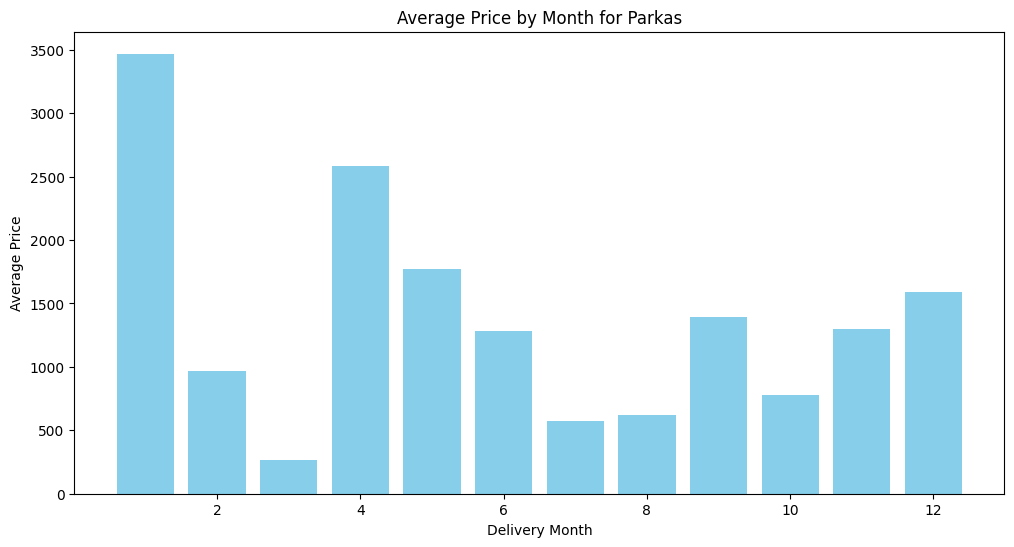

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the provided structure

# Aggregate Average Price by Month
df['DELIVERY_MONTH'] = df['requested_delivery_date'].dt.month

# Calculate average price by month
average_price_by_month = df.groupby('DELIVERY_MONTH')['value'].mean().reset_index()

# Plotting Average Price by Month
plt.figure(figsize=(12, 6))
plt.bar(average_price_by_month['DELIVERY_MONTH'], average_price_by_month['value'], color='skyblue')
plt.title('Average Price by Month for Parkas')
plt.xlabel('Delivery Month')
plt.ylabel('Average Price')
plt.show()

### Summer  Jun to Aug is at the least price point

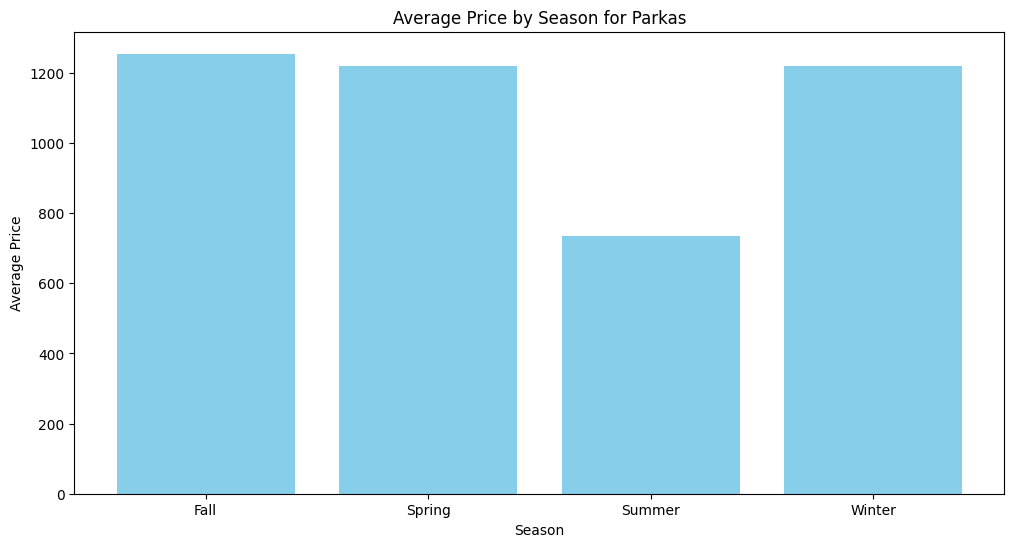

In [50]:
# Aggregate Average Price by Season
df['SEASON'] = df['DELIVERY_MONTH'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))

# Calculate average price by season
average_price_by_season = df.groupby('SEASON')['value'].mean().reset_index()

# Plotting Average Price by Season
plt.figure(figsize=(12, 6))
plt.bar(average_price_by_season['SEASON'], average_price_by_season['value'], color='skyblue')
plt.title('Average Price by Season for Parkas')
plt.xlabel('Season')
plt.ylabel('Average Price')
plt.show()

In [51]:
# Calculate sales for each product
#df['Sales'] = df['value'] * df['items']

# Group by product code and sum the sales
#product_sales = df.groupby('Product Code')['Sales'].sum().reset_index()

# Display the result
#print(product_sales)


In [54]:
# Extract month from 'Requested Delivery Date'
df['DELIVERY_MONTH'] = df['requested_delivery_date'].dt.month

# Create a 'SEASON' column based on 'DELIVERY_MONTH'
df['SEASON'] = df['DELIVERY_MONTH'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))

# Calculate monthly and seasonal quantity for each product
monthly_quantity = df.groupby(['Product Code', 'requested_delivery_date'])['items'].sum().reset_index()
seasonal_quantity = df.groupby(['Product Code', 'SEASON'])['items'].sum().reset_index()

# Display the results
print("Monthly Quantity:")
print(monthly_quantity)

print("\nSeasonal Quantity:")
print(seasonal_quantity)


Monthly Quantity:
    Product Code requested_delivery_date  items
0      L10705000              2010-01-28   25.0
1      L10705000              2010-02-01   73.0
2      L10705000              2010-02-04   45.0
3      L10705000              2010-02-22    2.0
4      L10705000              2010-03-01    5.0
..           ...                     ...    ...
725    L12919200              2012-05-25   12.0
726    L12919200              2012-05-30   23.0
727    L12919200              2012-05-31   15.0
728    L12919200              2012-06-01    2.0
729    L12919200              2012-06-30   15.0

[730 rows x 3 columns]

Seasonal Quantity:
    Product Code  SEASON  items
0      L10705000  Spring   59.0
1      L10705000  Winter  145.0
2      L10705100  Spring    4.0
3      L10705100  Summer    8.0
4      L10705100  Winter   83.0
..           ...     ...    ...
104    L12919100  Summer   17.0
105    L12919100  Winter   19.0
106    L12919200  Spring  428.0
107    L12919200  Summer   17.0
108    L12

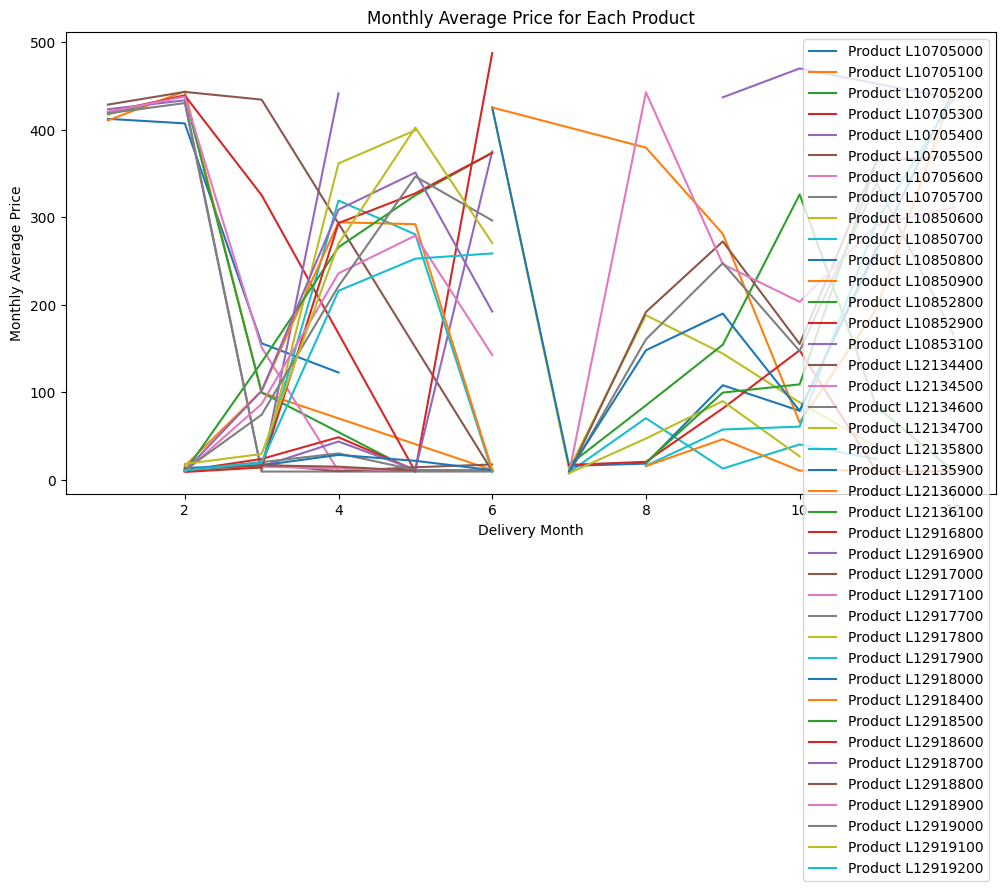

In [56]:
# Calculate monthly average price for each product
df['Monthly Average Price'] = df['value'] / df['items']

# Group by product code and month, then calculate the mean of the monthly average price
monthly_avg_price = df.groupby(['Product Code', 'DELIVERY_MONTH'])['Monthly Average Price'].mean().reset_index()

# Create a line chart for each product
plt.figure(figsize=(12, 6))

# Iterate through unique product codes
for product_code in monthly_avg_price['Product Code'].unique():
    product_data = monthly_avg_price[monthly_avg_price['Product Code'] == product_code]
    plt.plot(product_data['DELIVERY_MONTH'], product_data['Monthly Average Price'], label=f'Product {product_code}')

# Set labels and title
plt.title('Monthly Average Price for Each Product')
plt.xlabel('Delivery Month')
plt.ylabel('Monthly Average Price')

# Display legend
plt.legend()

# Show the line chart
plt.show()